In [11]:
from fktools import *

from sklearn.model_selection import train_test_split

from dist_metric import DistributionOverlap


from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Input, Dense, Dropout

In [12]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [13]:
model = Sequential([
    Input(shape=(8,)),

    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),

    Dense(8, activation="softmax"),
])

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = KLDivergence(),
    metrics=[DistributionOverlap()],
)

# model learning
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
)

loss, dist_overlap = model.evaluate(
    X_test,
    y_test,
    verbose=0,
)

Epoch 1/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - dist_overlap: 0.6181 - loss: 0.5284 - val_dist_overlap: 0.7286 - val_loss: 0.2748
Epoch 2/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dist_overlap: 0.7583 - loss: 0.2321 - val_dist_overlap: 0.7740 - val_loss: 0.2099
Epoch 3/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7832 - loss: 0.1987 - val_dist_overlap: 0.7882 - val_loss: 0.1923
Epoch 4/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dist_overlap: 0.7928 - loss: 0.1874 - val_dist_overlap: 0.7940 - val_loss: 0.1873
Epoch 5/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dist_overlap: 0.7967 - loss: 0.1831 - val_dist_overlap: 0.7962 - val_loss: 0.1844
Epoch 6/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7984 - loss: 0.1811 - val_dist_overlap: 0.7977 - val_loss: 0.1830
Epoch 7/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dist_overlap: 0.7998 - loss: 0.1799 - val_dist_overlap: 0.7990 - val_loss: 0.1817
Epoch 8/100
1175/1175 ━━━━━

In [16]:
print(f"test loss: {loss}")
print(f"test overlap: {dist_overlap}")

test loss: [0.5283651947975159, 0.23210838437080383, 0.19872242212295532, 0.1874028742313385, 0.18310531973838806, 0.18113115429878235, 0.17986398935317993, 0.1787254363298416, 0.17830422520637512, 0.17707368731498718, 0.1763397604227066, 0.17532309889793396, 0.17477762699127197, 0.1739998161792755, 0.173844575881958, 0.17316213250160217, 0.17259132862091064, 0.17220571637153625, 0.17171920835971832, 0.17141908407211304, 0.17055648565292358, 0.17063339054584503, 0.17025162279605865, 0.16970936954021454, 0.1697305291891098, 0.16912870109081268, 0.1688200682401657, 0.1684984266757965, 0.16849642992019653, 0.16809333860874176, 0.16846367716789246, 0.16802161931991577, 0.16739344596862793, 0.16778050363063812, 0.1671811193227768, 0.16715872287750244, 0.1668195277452469, 0.16657431423664093, 0.1666269600391388, 0.16681915521621704, 0.1664087176322937, 0.16644126176834106, 0.16661623120307922, 0.16627760231494904, 0.16606135666370392, 0.16636806726455688, 0.16626128554344177, 0.1655314564704

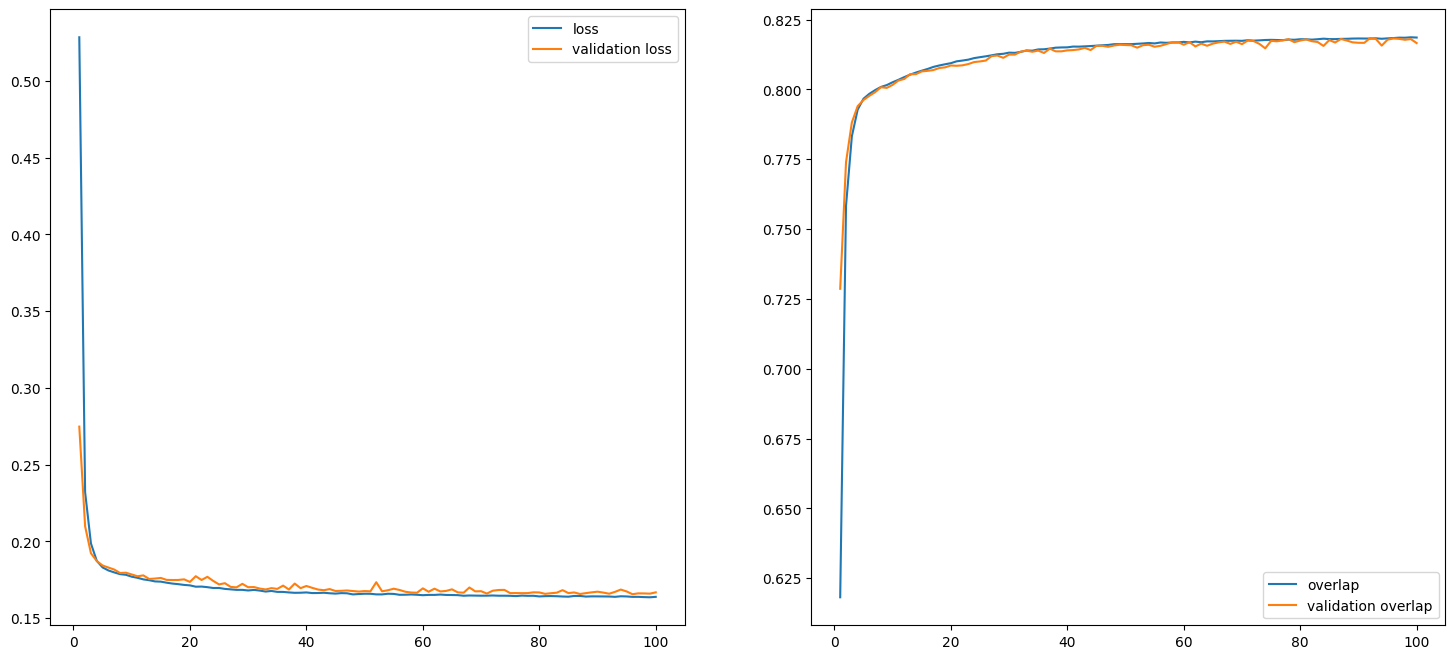

In [14]:
loss = history.history['loss']
acc = history.history['dist_overlap']

val_loss = history.history['val_loss']
val_acc = history.history['val_dist_overlap']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="validation loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
ax[1].plot(epochs, val_acc, label="validation overlap")
ax[1].legend()